In [31]:
#Bringing in data I downloaded from Seattle Open data and cleaned
import pandas as pd
import numpy as np

df = pd.read_csv('force_clean.csv')

,Unnamed: 0,Incident_Num,Incident_Type,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,date
0,0,251,1,East,CHARLIE,C2,1594,203,Black or African American,Male,2014-06-07 00:09:00
1,1,218,1,East,GEORGE,G1,1673,166,White,Male,2014-05-30 14:06:00
2,2,178,1,West,KING,K3,1690,125,Asian,Female,2014-05-23 17:24:00
3,3,179,1,East,EDWARD,E2,953,126,Black or African American,Male,2014-05-26 00:10:00
4,4,223,1,South,ROBERT,R1,1145,172,Black or African American,Male,2014-06-01 16:03:00


In [32]:
#Adding a count column to make visualization easier
array = np.ones(10642)
ser = pd.Series(array)
df['count'] = ser

In [33]:
#subsetting the data for the year 2019
df19 = df.loc[df['date'] > '2019-01-01', :]

In [18]:
#Seeing counts of force by race
df19['Subject_Race'].value_counts()

White                            704
Black or African American        479
Not Specified                    408
Asian                             57
Hispanic or Latino                36
American Indian/Alaska Native     13
Nat Hawaiian/Oth Pac Islander     10
Name: Subject_Race, dtype: int64

In [38]:
#Removing instances where subject race was not specified
df19 = df19.loc[df19['Subject_Race'] != 'Not Specified', :]

In [39]:
#Adjusting for population
# based on this https://www.seattle.gov/opcd/population-and-demographics/about-seattle#raceethnicity
#Census data: https://www.census.gov/quickfacts/fact/table/seattlecitywashington,US/PST045219
def label(row):
    if row['Subject_Race'] == 'White':
        return(.68)
    elif row['Subject_Race'] == 'Black or African American':
        return(.07)
    elif row['Subject_Race'] == 'Asian':
        return(.151)
    elif row['Subject_Race'] == 'Hispanic or Latino':
        return(.066)
    elif row['Subject_Race'] == 'Nat Hawaiian/Oth Pac Islander':
        return(.003)
    elif row['Subject_Race'] == 'American Indian/Alaska Native':
        return(.006)
    else:
        return(0)
    
df19['race_weights'] = df19.apply (lambda row: label(row), axis=1)

In [44]:
#getting population per 1000 
df19['pop'] = df19['race_weights']*753.675
df19['pop'] = df19['pop'].round(3)
df19.head()

,Unnamed: 0,Incident_Num,Incident_Type,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,date,count,race_weights,pop
8845,9262,39306,1,East,GEORGE,G3,2779,18897,White,Male,2019-01-01 07:20:00,1.0,0.680,512.499
8936,9359,39407,1,North,LINCOLN,L2,1665,18916,White,Male,2019-01-03 13:01:00,1.0,0.680,512.499
8937,9360,39483,1,North,NORA,N3,2203,18924,White,Male,2019-01-05 18:05:00,1.0,0.680,512.499
8939,9362,39487,1,South,OCEAN,O3,1655,18927,Asian,Male,2019-01-06 01:55:00,1.0,0.151,113.805
8940,9363,39487,1,South,OCEAN,O3,1655,18928,Asian,Male,2019-01-06 01:55:00,1.0,0.151,113.805


In [56]:
#getting new data frame aggregated by race
byRace = df19.groupby('Subject_Race', as_index = False)['count'].count()

In [66]:
#Adding the weighted counts to the new data frame
byRace['weights'] = byRace.apply (lambda row: label(row), axis=1)
byRace['pop'] = byRace['weights']*753.675
byRace['count_per1000'] = byRace['count']/byRace['pop']

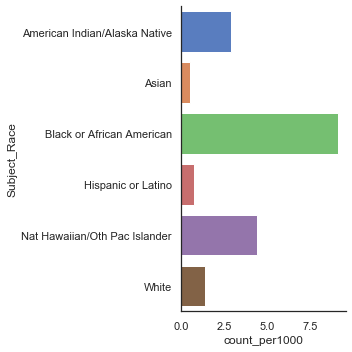

In [86]:
import seaborn as sns

#number of uses of force per 1000 people in each racial group in 2019
chart = sns.catplot(data = byRace, y = 'Subject_Race', x = 'count_per1000', kind="bar", palette="muted")

#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [79]:
#looking at aggregation by race and incident type
RaceInc = df19.groupby(['Subject_Race', 'Incident_Type'], as_index = False)['count'].count()
RaceInc['weights'] = RaceInc.apply (lambda row: label(row), axis=1)
RaceInc['pop'] = RaceInc['weights']*753.675
RaceInc['count_per1000'] = RaceInc['count']/RaceInc['pop']
RaceInc

,Subject_Race,Incident_Type,count,weights,pop,count_per1000
0,American Indian/Alaska Native,1,9,0.006,4.522050,1.990248
1,American Indian/Alaska Native,2,4,0.006,4.522050,0.884555
2,Asian,1,47,0.151,113.804925,0.412987
3,Asian,2,4,0.151,113.804925,0.035148
4,Asian,3,6,0.151,113.804925,0.052722
5,Black or African American,1,362,0.070,52.757250,6.861616
6,Black or African American,2,112,0.070,52.757250,2.122931
7,Black or African American,3,5,0.070,52.757250,0.094774
8,Hispanic or Latino,1,29,0.066,49.742550,0.583002
9,Hispanic or Latino,2,7,0.066,49.742550,0.140725


In [77]:
#Or by Race and Gender
df19.groupby(['Subject_Race', 'Subject_Gender'], as_index = False)['count'].count()

,Subject_Race,Subject_Gender,count
0,American Indian/Alaska Native,Female,3
1,American Indian/Alaska Native,Male,10
2,Asian,Female,23
3,Asian,Male,29
4,Asian,Not Specified,5
5,Black or African American,Female,90
6,Black or African American,Male,389
7,Hispanic or Latino,Female,3
8,Hispanic or Latino,Male,33
9,Nat Hawaiian/Oth Pac Islander,Female,1
